<a href="https://colab.research.google.com/github/logicalschema/data620/blob/main/Project%202/Sung_Lee_Data_620_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data 620 Project 2
[Github Link](https://github.com/logicalschema/data620/tree/main/Project%202)  

[YouTube Video](https://youtu.be/tijhjM2fUkw)

<img src=https://raw.githubusercontent.com/logicalschema/data620/main/Project%202/data/projectimage.jpg width="200">

# Introduction

The purpose of this project is to analyze a 2-mode network dataset. A 2-mode network dataset (i.e a bipartite dataset) has "two different types of nodes, and links determine relationships between one set of nodes and the other" (*Social Network Analysis for Startups* (p. 96)). 

The dataset selected is ["Cities and Service Firms"](https://networkdata.ics.uci.edu/netdata/html/cities.html) which looks at 46 firms over 55 cities; additional information can be found [here](https://www.lboro.ac.uk/gawc/rb/rb13.html). The firms were selected by having offices in at least 15 different cities. The two modes are cities and firms. Cities are linked to firms but not to one another. The firms are from one of the following industries: `Accountancy`, `Advertising`, `Banking and Finance`, and `Law`. For the matrix given, the firm and corresponding city has a value from 0 to 3. A score of 0 means that the firm is not in the city and 3 means that it has a major presence in the city.

I was interested in this dataset because I have been fascinated in learning about global cities and globalization.

# Setting Up

The following code imports libraries and sets up functions that are from the *Social Network Analysis for Startups* book: `island_method`, `trim_edges`, and `connected_component_subgraphs`. The function `connected_component_subgraphs` was deprecated so another replacement was available.









In [ ]:
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from IPython.display import display_html
import itertools
import math

from collections import defaultdict
import numpy
from scipy.cluster import hierarchy
from scipy.spatial import distance


# Function for displaying dataframes side by side
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

# Functions trim_edges and island_method are from Tsvetovat, Maksim; Kouznetsov, Alexander. 
# Tsvetovat, Maksim; Kouznetsov, Alexander. Social Network Analysis for Startups (pp. 64, 102-104). O'Reilly Media. Kindle Edition. 
def trim_edges(g, weight = 1): 
  g2 = nx.Graph()
  for f, to, edata in g.edges( data = True): 
    if edata['weight'] > weight: 
      g2.add_edge(f, to, weight=edata['weight'])

  return g2

def island_method( g, iterations = 5): 
  weights = [edata['weight'] for f, to, edata in g.edges( data = True)]
  mn = int( min(weights))
  mx = int( max(weights))

  #compute the size of the step, so we get a reasonable step in iterations
  step = int(( mx-mn)/ iterations)


  return [[ threshold, trim_edges( g, threshold)] for threshold in range( mn, mx, step)]


# I had to redeclare connected_component_subgraphs because it was deprecated
# https://networkx.org/documentation/networkx-2.1/reference/algorithms/generated/networkx.algorithms.components.connected_component_subgraphs.html
def connected_component_subgraphs(Graph):
  temp = [Graph.subgraph(c).copy() for c in nx.connected_components(Graph)]
  return temp[0]

# Variable to keep track of figures
fig_no = 1

# Data 

The data is available from Github. I cleaned it and organized it for consumption. Here is a snippet of the matrix data.

In [ ]:
# Builld the dataframes
matrix = pd.read_csv('https://raw.githubusercontent.com/logicalschema/data620/main/Project%202/data/cities_df.csv', index_col=False)
firm_info = pd.read_csv('https://raw.githubusercontent.com/logicalschema/data620/main/Project%202/data/firms_info_df.csv', index_col=False)

# Snipped of the matrix data
display_side_by_side(matrix.head(5), matrix.tail(5) )


,City,KP,CL,EY,AA,PW,GR,DM,LH,SS,TH,OM,DE,YR,TM,PU,AM,HS,BA,NW,ST,CR,DR,MO,PA,CS,BB,BT,UB,AB,CB,BM,WC,LL,CO,SK,BC,DW,GJ,HH,JD,MC,SQ,WE,AO,CC,FF,Total
0,Amsterdam,3,3,1,1,3,1,1,1,1,1,1,1,0,0,3,3,2,2,1,0,0,1,1,2,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,38
1,Atlanta,3,3,2,2,2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,18
2,Bangkok,1,1,1,2,2,1,1,0,1,1,1,3,0,0,1,1,2,2,1,3,0,0,1,1,0,0,1,1,1,1,3,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,39
3,Barcelona,1,1,1,1,2,1,1,1,1,1,1,0,0,0,2,3,1,3,0,0,0,0,0,3,1,1,0,0,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,33
4,Beijing,1,1,1,1,2,0,1,0,1,1,1,3,0,0,1,1,1,1,1,1,0,0,2,1,0,0,1,1,1,0,2,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,32
,City,KP,CL,EY,AA,PW,GR,DM,LH,SS,TH,OM,DE,YR,TM,PU,AM,HS,BA,NW,ST,CR,DR,MO,PA,CS,BB,BT,UB,AB,CB,BM,WC,LL,CO,SK,BC,DW,GJ,HH,JD,MC,SQ,WE,AO,CC,FF,Total
50,Tokyo,3,3,3,2,3,1,1,0,1,1,1,0,2,1,0,1,2,3,1,2,1,1,2,3,3,3,3,3,1,1,3,3,0,1,1,0,0,1,0,1,0,0,1,1,1,1,66
51,Toronto,3,3,3,2,3,1,1,1,1,1,1,1,1,2,3,3,2,2,1,0,0,1,2,2,1,0,1,1,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48
52,Warsaw,1,1,2,1,1,0,1,1,0,1,1,0,1,0,3,1,1,1,0,0,3,0,1,1,0,0,1,1,1,0,3,3,0,0,0,0,0,0,2,0,1,0,0,1,1,0,36
53,Washington DC,3,3,3,2,2,0,0,0,0,0,0,0,0,1,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,1,3,3,3,3,3,3,3,2,3,3,1,3,2,0,0,0,54


Here is a snippet of the firm information.

In [ ]:
# Snippet of the firm_info
display_side_by_side(firm_info.head(5), firm_info.tail(5) )


,ID,Name,Category
0,KP,KPMG,Accountancy
1,CL,Coopers & Lybrand,Accountancy
2,EY,Ernst & Young International,Accountancy
3,AA,Arthur Andersen,Accountancy
4,PW,Price Waterhouse,Accountancy
,ID,Name,Category
41,SQ,"Squire, Sanders & Dempsey",Law
42,WE,"Wilson, Elser, Moskowitz, Edelman & Dicker",Law
43,AO,Allen & Overy,Law
44,CC,Clifford Chance,Law


# Initializing the Graph

Here is the original graph that is a bipartite graph. The two modes are cities and firms. Each edge is drawn with the service score as a weight.

In [ ]:
# Initialize the Graph
G = nx.Graph()

# Create the nodes
city_nodes = matrix['City'].tolist()
firm_nodes = firm_info['ID'].tolist()
G.add_nodes_from(city_nodes, bipartite='city')
G.add_nodes_from(firm_nodes, bipartite='firm')

# Create the edges
for firm in firm_nodes:
	temp = matrix[matrix[firm] > 0][['City', firm]].sort_values(by=firm, ascending=False)
	records = temp.to_records(index=False)
	for record in records:
		G.add_edge(record[0], firm, weight=record[1])

# Store the sets of the bipartite graph: cities and firms
cities, firms = bipartite.sets(G)

# Initial View of Graph

Here is an initial view of the graph. Red nodes as cities and blue nodes as firms. The width of each node is determined by their individual degree.

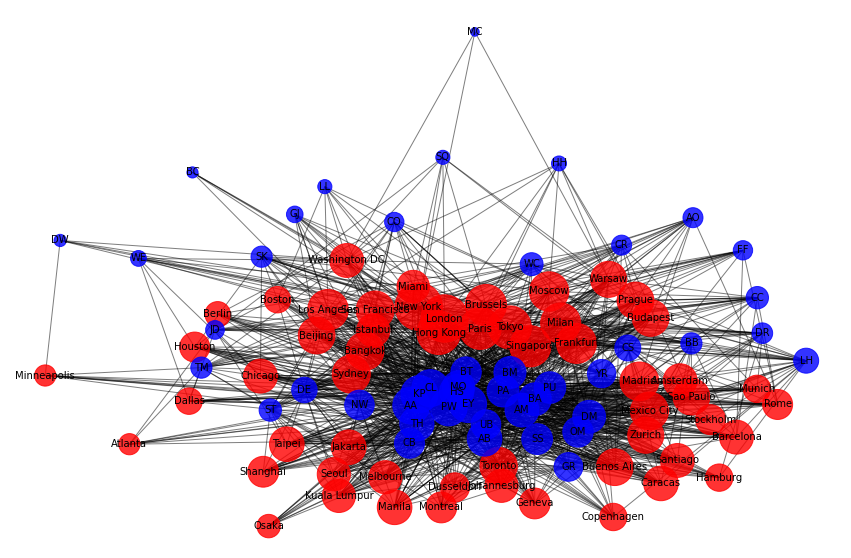

In [ ]:
plt.figure(fig_no,figsize=(15,10)) 
fig_no +=1
plt.axis('off')

# Calculate the degree centrality
cityDegree = nx.degree(G, cities) 
firmDegree = nx.degree(G, firms)

weights = [edata['weight'] for f, t, edata in G.edges(data = True)]

#This is for drawing the widths of the weights without destroying readability
drawWeights = [weight / 10 for weight in weights]

pos = nx.spring_layout(G, iterations=100)

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=cities,
                       node_color='red',
                       node_size=[v * 50 for v in dict(cityDegree).values()],
                       alpha=0.8
                       )
nx.draw_networkx_nodes(G,pos,
                       nodelist=firms,
                       node_color='blue',
                       node_size=[v * 25 for v in dict(firmDegree).values()],
                       alpha=0.8
                       )

nx.draw_networkx_edges(G, pos, width=1, alpha=0.5)
labels = nx.draw_networkx_labels(G, pos, font_size=10)
plt.savefig('proj2_fig' + str(fig_no) + '.png')

# Projecting the Graph

Because the graph is 2-mode, we are able to project the graph onto one of its node sets. The function `weighted_projected_graph` projects the graph onto a set with "weights representing the number of shared neighbors or the ratio between actual shared neighbors and possible shared neighbors". More information can be found [here](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.bipartite.projection.weighted_projected_graph.html).

## Firm Graph Projection

The `firmGraph` is created using the projection function.

In [ ]:
firmGraph = bipartite.weighted_projected_graph(G, firms, ratio=False)
firmGraph = connected_component_subgraphs(firmGraph)

### Visualization of the Firm Graph Projection

Here is a visual of the `firmGraph`. Edges are colored depending upon their weight.

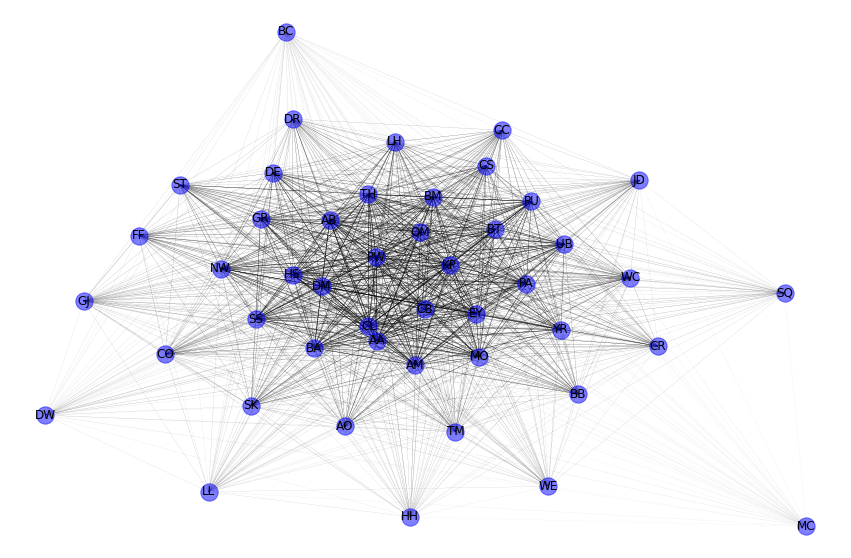

In [ ]:
weights = [edata['weight'] for f, t, edata in firmGraph.edges(data = True)]

#This is for drawing the widths of the weights without destroying readability
drawWeights = [weight / 100 for weight in weights]

plt.figure(fig_no,figsize=(15,10))
fig_no +=1
plt.axis('off')

# Positions for all nodes
pos=nx.spring_layout(firmGraph, iterations=100)

nx.draw_networkx_nodes(firmGraph, pos,
                       nodelist=firms,
                       node_color='blue',
                       alpha=0.5)

# Draw the edges
nx.draw_networkx_edges(firmGraph, pos, width=drawWeights, alpha=1)

# Draw the labels
labels = nx.draw_networkx_labels(firmGraph, pos, font_size=12)
plt.savefig('proj2_fig' + str(fig_no) + '.png')

## City Graph Projection

This is a projection of the original 2-mode dataset onto the cities set.

In [ ]:
cityGraph = bipartite.weighted_projected_graph(G, cities, ratio=False)
cityGraph = connected_component_subgraphs(cityGraph)
weights = [edata['weight'] for f, t, edata in cityGraph.edges(data = True)]


### Visualization of the City Graph Projection

Here is a visual of the `cityGraph` projection.

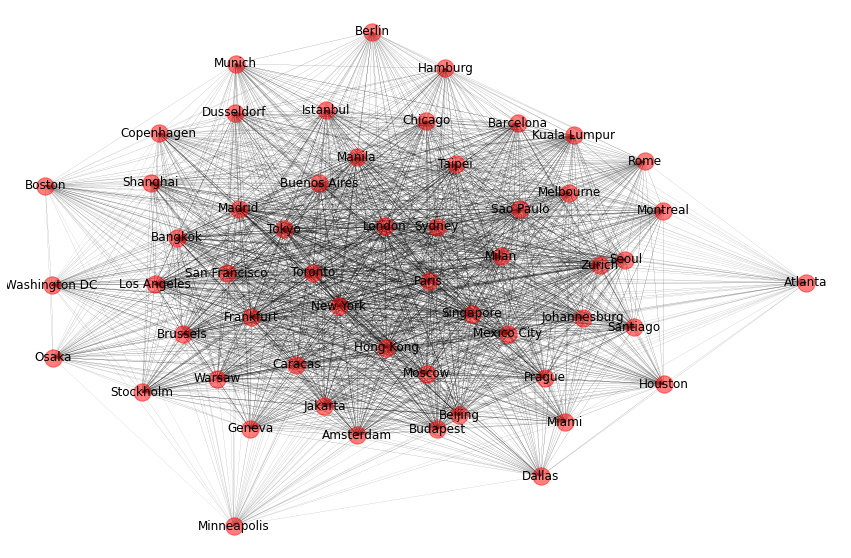

In [ ]:
plt.figure(fig_no,figsize=(15,10)) 
fig_no +=1
plt.axis('off')

#This is for drawing the widths of the weights without destroying readability
drawWeights = [weight / 100 for weight in weights]



# Positions for all nodes
pos=nx.spring_layout(cityGraph, iterations=100)

nx.draw_networkx_nodes(cityGraph, pos,
                       nodelist=cities,
                       node_color='red',
                       alpha=0.5)

# Draw the edges
nx.draw_networkx_edges(cityGraph, pos, width=drawWeights, alpha=1)

# Draw the labels
labels = nx.draw_networkx_labels(cityGraph, pos, font_size=12)
plt.savefig('proj2_fig' + str(fig_no) + '.png')

# Island Method

The island method is discussed in *Social Network Analysis for Startups* on pages 61-64 and chapter 5. Using the code from the text and additional code from the `networkx` documentation site, the method will be used here. Specifically, on the projections of the 2-mode graph. The book says, "When the valleys in the island are flooded, the island essentially splits into smaller islands — revealing where the highest peaks are, and making these peaks smaller. It is possible to raise the water level so high that the entire island will disappear, so this method needs to be applied judiciously to reveal meaningful results."

## Island Method on `cityGraph`

First, lets look at the weights of `cityGraph`. Looking at a bar graph of the weights a threshold of 35 looks good for raising the level to find some meaningful results.

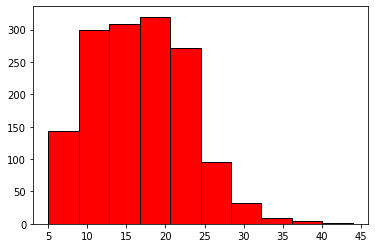

In [ ]:
weights =[edata['weight'] for f, t, edata in cityGraph.edges( data = True)]
plt.figure(fig_no)
fig_no +=1 
plt.hist(weights, color='red', edgecolor='black')
plt.savefig('proj2_fig' + str(fig_no) + '.png')

Working in concert with the bar graph, the function `island_method` helps provide an iterative approach to identify a threshold. However, be careful with the threshold as it can cause errors by throwing divide by zero errors. Looking at the 1st entry, if edges with a weight of 5 are dropped, there would be 55 nodes remaining and 55 islands.

In [ ]:
cc = connected_component_subgraphs(cityGraph)
islands = island_method(cc, 35)
for i in islands[:5]:
  # Print the threshold level, size of the graph, and number of connected components
  print(i[0], len(i[1]), len(connected_component_subgraphs(i[1])))

for i in islands[-5:]:
  # Print the threshold level, size of the graph, and number of connected components
  print(i[0], len(i[1]), len(connected_component_subgraphs(i[1])))

5 55 55
6 55 55
7 55 55
8 55 55
9 53 53
39 2 2
40 2 2
41 2 2
42 2 2
43 2 2


## Visual of `cityGraph` after Island Method

Here is a visual of what remains after the edges are dropped using a threshold of 35. Observe how the 4 cities that remain are Tokyo, Hong Kong, New York, and London remain. Also, observe how there is no direct link from Tokyo to Hong Kong. If you were in Tokyo, to reach Hong Kong, you would need to work through New York or London. Bear in mind that this is a projection, so a firm would serve as an intermediary for these connections. Looking at the graph, you can see two islands.

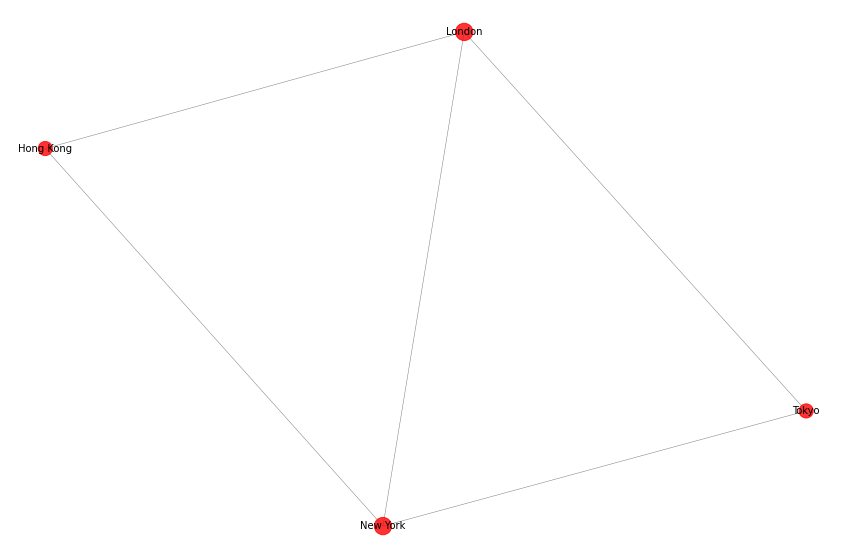

In [ ]:
plt.figure(fig_no,figsize=(15,10)) 
fig_no +=1
plt.axis('off')

# Copy the G graph
D = cityGraph.copy()

# Remove edges <= 35
D = trim_edges(D, 35)

# Remove nodes without an edge
D.remove_nodes_from(nx.isolates(D))

D_cities = D.nodes

# Calculate the degree centrality
D_cityDegree = nx.degree(D, D_cities) 

pos = nx.spring_layout(D, iterations=100)

# nodes
nx.draw_networkx_nodes(D,pos,
                       nodelist=D_cities,
                       node_color='red',
                       node_size=[v * 100 for v in dict(D_cityDegree).values()],
                       alpha=0.8
                       )

nx.draw_networkx_edges(D, pos, width=0.5, alpha=0.5)
labels = nx.draw_networkx_labels(D, pos, font_size=10)
plt.savefig('proj2_fig' + str(fig_no) + '.png')

## Island Method on `firmGraph`

Now, let's use the island method on the `firmGraph` which is a projection of the 2-mode graph onto the firms set.

Generating a bar graph, I select the weight of 50 to trim the graph.



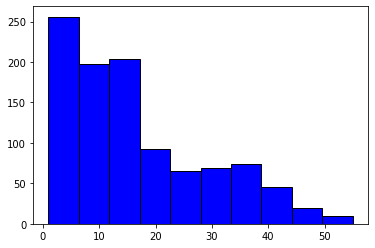

In [ ]:
weights =[edata['weight'] for f, t, edata in firmGraph.edges( data = True)]
plt.figure(fig_no)
fig_no +=1 
plt.hist(weights, color='blue', edgecolor='black')
plt.savefig('proj2_fig' + str(fig_no) + '.png')

Here is the `island_method` function at work. At a threshold of 50, we will be left with 5 nodes and 5 islands. Which firms will remain?

In [ ]:
cc = connected_component_subgraphs(firmGraph)
islands = island_method(cc, 50)
for i in islands[:5]:
  # Print the threshold level, size of the graph, and number of connected components
  print(i[0], len(i[1]), len(connected_component_subgraphs(i[1])))

for i in islands[-5:]:
  # Print the threshold level, size of the graph, and number of connected components
  print(i[0], len(i[1]), len(connected_component_subgraphs(i[1])))

1 46 46
2 46 46
3 45 45
4 45 45
5 44 44
50 5 5
51 5 5
52 5 5
53 5 5
54 5 5


## Visual of `firmGraph` after Island Method

Here is what the `firmGraph` looks like after we apply a threshold of 50. We are left with 5 firms: KPMG, Coopers & Lybrand, Ernst & Young International, Arthur Andersen, and Price Waterhouse. These 5 firms are identified in the `Accountancy` category. Observe how there are connections such that they connect to one another (bear in mind this is a projected graph so they would connect by presence in cities).

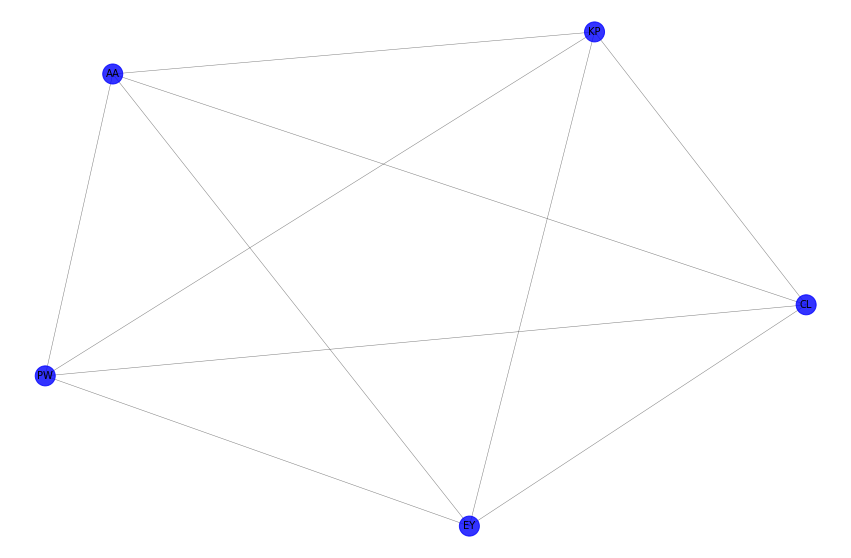

In [ ]:
plt.figure(fig_no,figsize=(15,10)) 
fig_no +=1
plt.axis('off')

# Copy the G graph
D = firmGraph.copy()

# Remove edges <= 50
D = trim_edges(D, 48)

# Remove nodes without an edge
D.remove_nodes_from(nx.isolates(D))

D_firms = D.nodes

# Calculate the degree centrality
D_firmDegree = nx.degree(D, D_firms) 

pos = nx.spring_layout(D, iterations=100)

# nodes
nx.draw_networkx_nodes(D,pos,
                       nodelist=D_firms,
                       node_color='blue',
                       node_size=[v * 100 for v in dict(D_firmDegree).values()],
                       alpha=0.8
                       )

nx.draw_networkx_edges(D, pos, width=0.5, alpha=0.5)
labels = nx.draw_networkx_labels(D, pos, font_size=10)
plt.savefig('proj2_fig' + str(fig_no) + '.png')

In [ ]:
l = list(D_firms)
temp = firm_info.ID.isin(l)
clusterFirms = firm_info[temp]
clusterFirms


,ID,Name,Category
0,KP,KPMG,Accountancy
1,CL,Coopers & Lybrand,Accountancy
2,EY,Ernst & Young International,Accountancy
3,AA,Arthur Andersen,Accountancy
4,PW,Price Waterhouse,Accountancy


# Conclusion

Looking at the 2-mode dataset of firms and cities, it was significant to look at the connections between the cities of New York, London, Hong Kong, and Tokyo with no apparent link between Hong Kong and Tokyo. In addition, the strong presence of the accounting firms. 

For further study, I would like to compile a similar dataset for today as the last dataset is from the late 1990's and to see if it would give portents of a new world power and relationships between nations. Perhaps, another mode can be added that graphs the information onto countries.